<a href="https://colab.research.google.com/github/helena0070406/Code/blob/main/exercise4_pca_yujing_%26_haiwei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

here input the data we need and print all the columns


In [2]:
df = pd.read_csv('water_potability.csv')
df.dropna(inplace=True)
print(df)
print(df['Hardness'].values)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4    

here we select two variables Hardness and Sulfate, and draw their scatter diagram and check the scatter distribution

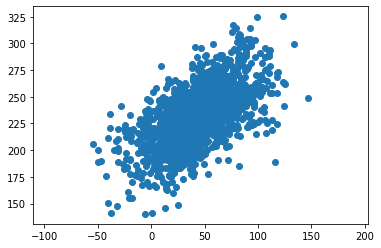

In [3]:
X = [df['Hardness'].values, df['Sulfate'].values]
scale=np.array([[1,0], [0,0.4]])  # Standard deviations are 1 and 0.4
rotate=np.array([[1,-1], [1,1]]) / math.sqrt(2)
transform = np.dot(rotate, scale)
X=np.dot(transform, X)
X=X.T
plt.axis('equal')
plt.scatter(X[:,0], X[:,1]);

In [4]:
from sklearn.decomposition import PCA
def arrow(v1, v2, ax):
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v2, v1, arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

Principal axes: [[-0.75682876 -0.65361321]
 [ 0.65361321 -0.75682876]]
Explained variance: [1069.32042109  267.38691316]
Mean: [ 44.32018223 232.82052235]


Then we draw vectors whose directions reflect those of the principal axes, and whose lengths are the corresponding variances. Then we plot the data in this new coordinate system. We can see the scatter plot.

In [5]:
Z=pca.transform(X)
fig, axes = plt.subplots(1,2, figsize=(60,40))
axes[0].axis('equal')
axes[0].scatter(X[:,0], X[:,1])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0], Z[:,1])
for l, v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0], v*l*3, axes[0])
for l, v in zip([1.0,0.16], [np.array([1.0,0.0]),np.array([0.0,1.0])]):
    arrow([0,0], v*l*3, axes[1])
axes[0].set_title("Original")
axes[1].set_title("Transformed")

Text(0.5, 1.0, 'Transformed')

After dimensionality reduction, we reduce the two-dimensional array to one-dimensional, and get a scatter diagram close to 0, which is the principal component we need

[[-0.75682876 -0.65361321]]


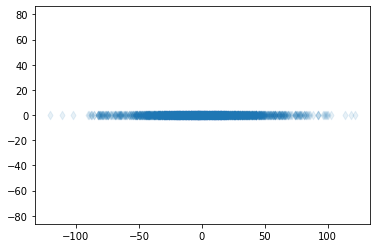

In [6]:
pca=PCA(n_components=1)
pca.fit(X)
Z=pca.transform(X)
print(pca.components_)
plt.axis('equal')
plt.scatter(Z[:,0],np.zeros(len(Z[:,0])), marker="d", alpha=0.1);

We get the desired results. This method is relatively simple and easy to reduce the dimension. Even for large samples, it is easy to screen the desired results